<a href="https://colab.research.google.com/github/Sardaar2003/GFG_Data_Science_Course_Assignment/blob/main/Black_Friday_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns

In [114]:
dt1=pd.read_csv('BlackFriday.csv')
dt1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [115]:
dt1.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [116]:
dt1.shape

(537577, 12)

In [117]:
del dt1['Product_Category_2']
del dt1['Product_Category_3']

In [118]:
dt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     537577 non-null  int64 
 1   Product_ID                  537577 non-null  object
 2   Gender                      537577 non-null  object
 3   Age                         537577 non-null  object
 4   Occupation                  537577 non-null  int64 
 5   City_Category               537577 non-null  object
 6   Stay_In_Current_City_Years  537577 non-null  object
 7   Marital_Status              537577 non-null  int64 
 8   Product_Category_1          537577 non-null  int64 
 9   Purchase                    537577 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 41.0+ MB


In [119]:
dt1['User_ID'].nunique()

5891

In [120]:
dt1['Product_ID'].nunique()

3623

In [121]:
dt1['Gender'].unique()

array(['F', 'M'], dtype=object)

In [122]:
dt1['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [123]:
dt1['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [124]:
dt1['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [125]:
dt1['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [126]:
dt1['Marital_Status'].unique()

array([0, 1])

In [127]:
dt1['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9])

In [128]:
dt1['Purchase'].sum()

5017668378

In [129]:
for col in dt1.columns:
  print(col,":",dt1[col].nunique())

User_ID : 5891
Product_ID : 3623
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 18
Purchase : 17959


In [130]:
gen=dt1['Gender']

In [131]:
gen

0         F
1         F
2         F
3         F
4         M
         ..
537572    M
537573    M
537574    M
537575    M
537576    M
Name: Gender, Length: 537577, dtype: object

In [132]:
data=pd.DataFrame({'Ratio':[len(dt1[dt1["Gender"]=='M']),len(dt1[dt1['Gender']=='F'])]},index=['Male','Female'])
data

,Ratio
Male,405380
Female,132197


<Axes: ylabel='Ratio'>

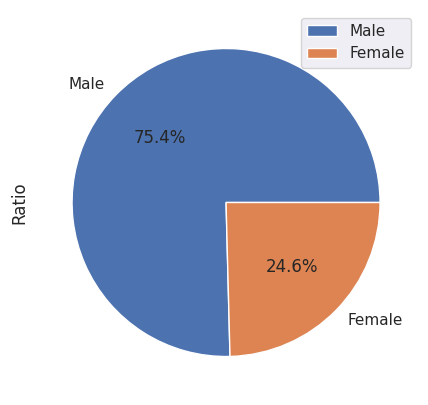

In [133]:
data.plot.pie(y='Ratio',figsize=(5,5),autopct='%.1f%%')

<Axes: title={'center': 'Gender Ratio'}>

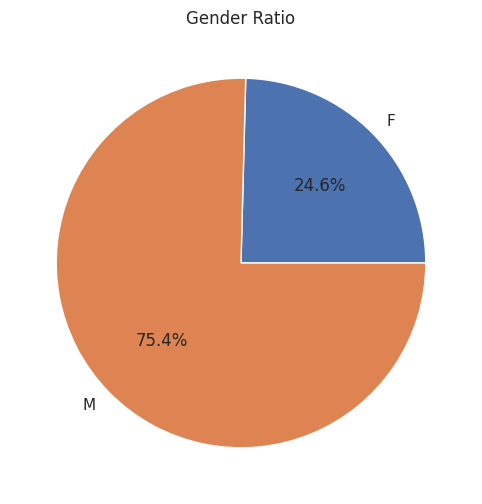

In [134]:
dt1.groupby('Gender').size().plot(kind='pie',autopct="%.1f%%",title='Gender Ratio')

<Axes: xlabel='Gender'>

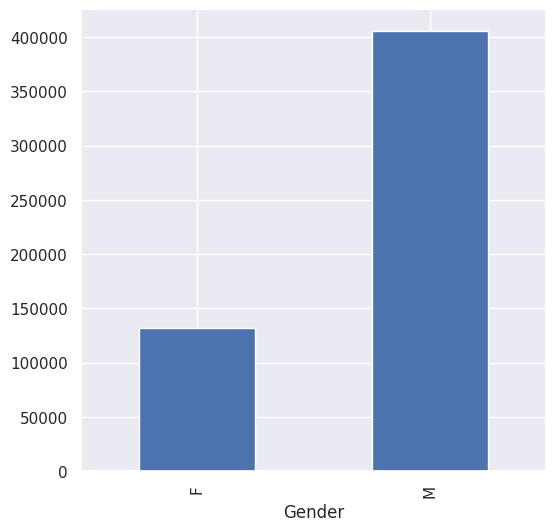

In [135]:
dt1.groupby('Gender').size().plot(kind='bar',figsize=(6,6))

In [136]:
dt1.groupby('Gender').size()

Gender
F    132197
M    405380
dtype: int64

In [137]:
dt1.groupby('Gender').sum()['Purchase']

<ipython-input-137-2cc44f0cdaa8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dt1.groupby('Gender').sum()['Purchase']


Gender
F    1164624021
M    3853044357
Name: Purchase, dtype: int64

<ipython-input-138-c266dd4dea9e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dt1.groupby('Gender').sum()['Purchase'].plot(kind='pie',autopct='%.1f%%')


<Axes: ylabel='Purchase'>

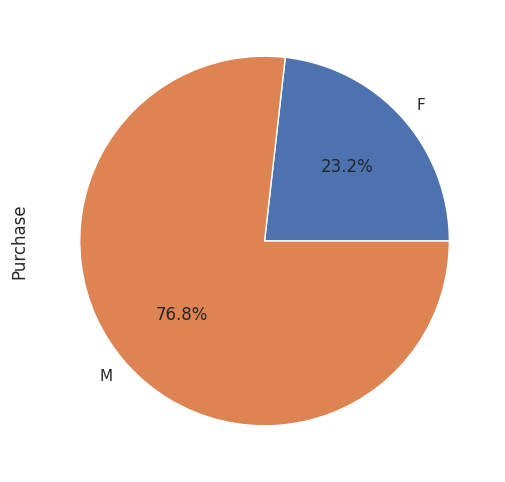

In [138]:
dt1.groupby('Gender').sum()['Purchase'].plot(kind='pie',autopct='%.1f%%')

<ipython-input-139-23f75ff8f9f8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dt1.groupby('Gender').sum()['Purchase'].plot(kind='bar')


<Axes: xlabel='Gender'>

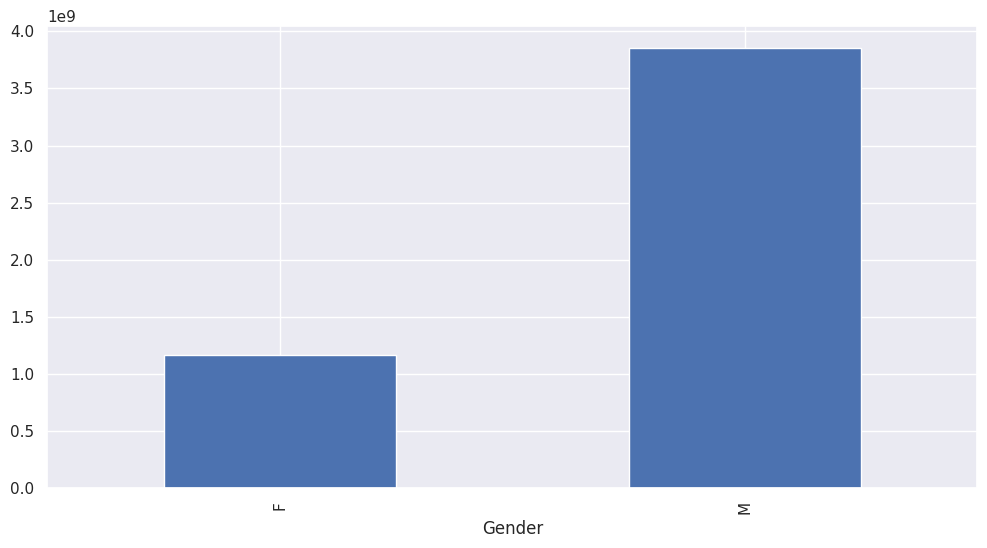

In [139]:
dt1.groupby('Gender').sum()['Purchase'].plot(kind='bar')

In [140]:
dt1.groupby('Gender').mean()['Purchase']

<ipython-input-140-a96062836a2e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dt1.groupby('Gender').mean()['Purchase']


Gender
F    8809.761349
M    9504.771713
Name: Purchase, dtype: float64

<ipython-input-141-dc8f73e50553>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dt1.groupby('Gender').mean()['Purchase'].plot(kind='pie',autopct='%.1f%%')


<Axes: ylabel='Purchase'>

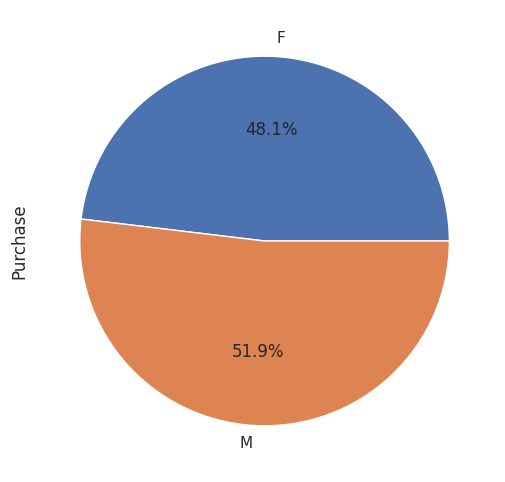

In [141]:
dt1.groupby('Gender').mean()['Purchase'].plot(kind='pie',autopct='%.1f%%')

In [142]:
dt1.groupby('Age').size()

Age
0-17      14707
18-25     97634
26-35    214690
36-45    107499
46-50     44526
51-55     37618
55+       20903
dtype: int64

<Axes: title={'center': 'Age purchase distribution'}, xlabel='Age'>

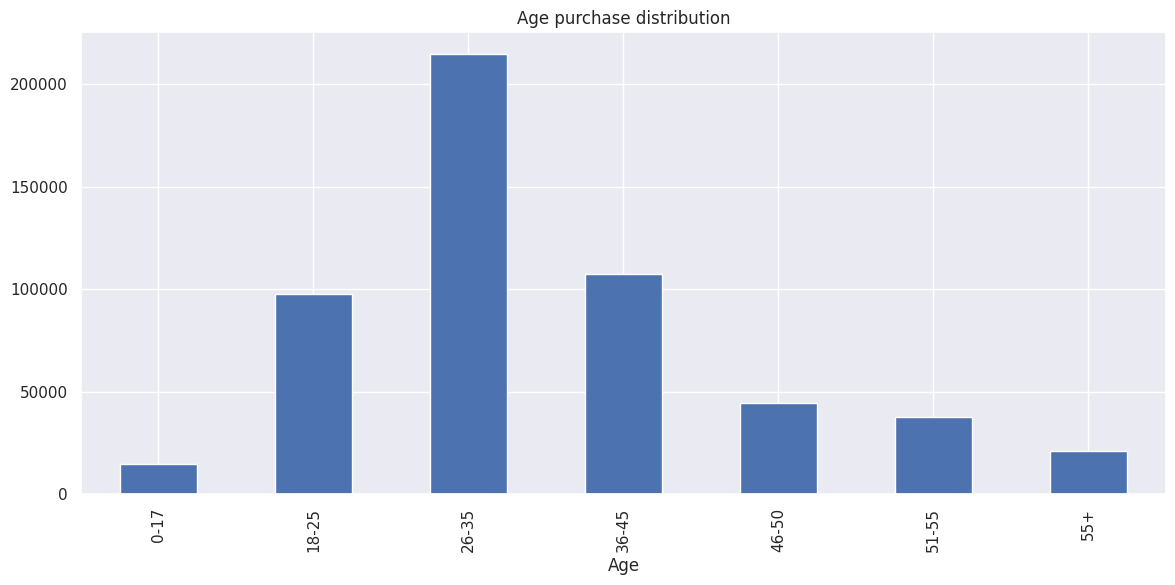

In [143]:
dt1.groupby('Age').size().plot(kind='bar',figsize=(14,6),title='Age purchase distribution')

<Axes: title={'center': 'Age purchase distribution'}>

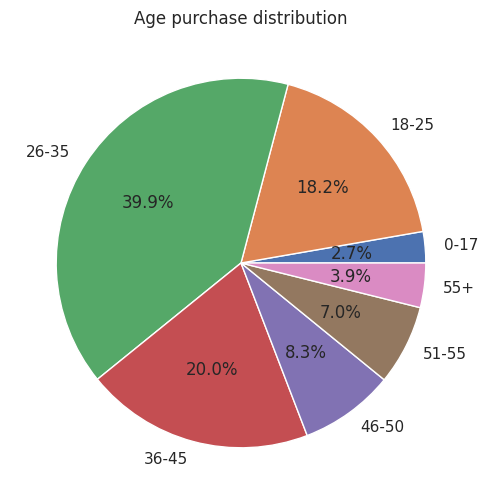

In [144]:
dt1.groupby('Age').size().plot(kind='pie',figsize=(14,6),title='Age purchase distribution',autopct='%.1f%%')

In [145]:
lst=[]
for i in dt1['Age'].unique():
  lst.append([i,dt1[dt1['Age']==i]['Product_ID'].nunique()])
print(lst)

data=pd.DataFrame(lst,columns=['Age','Products'])
print(data)

[['0-17', 2300], ['55+', 2573], ['26-35', 3419], ['46-50', 3099], ['51-55', 2877], ['36-45', 3318], ['18-25', 3213]]
     Age  Products
0   0-17      2300
1    55+      2573
2  26-35      3419
3  46-50      3099
4  51-55      2877
5  36-45      3318
6  18-25      3213


<Axes: title={'center': 'Age group per each product'}, xlabel='Age'>

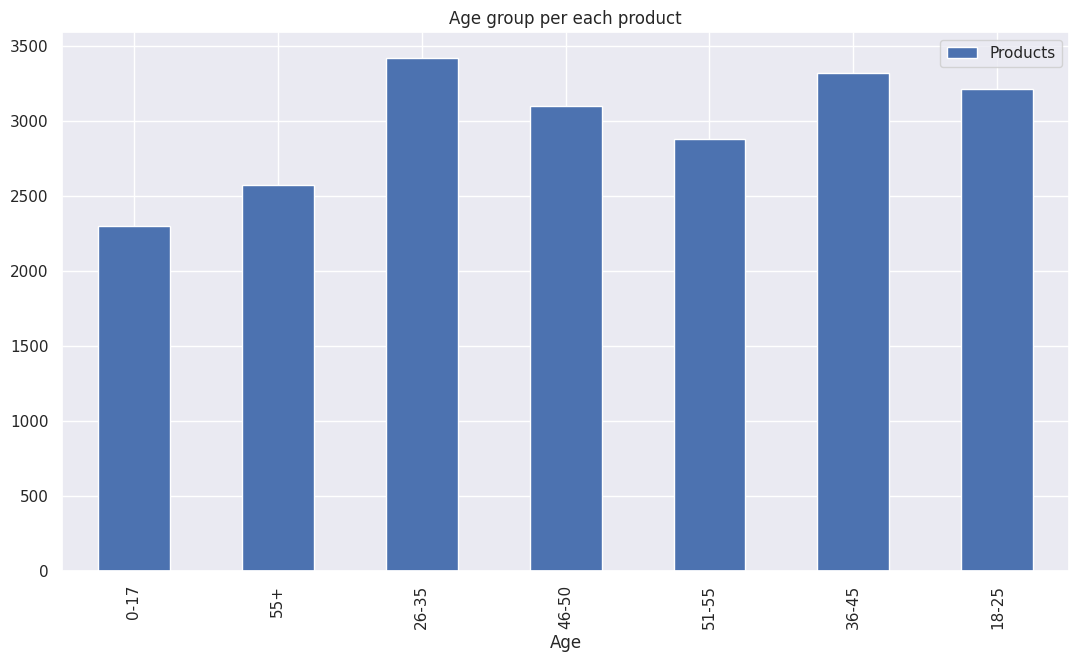

In [146]:
data.plot(kind='bar',title='Age group per each product',x='Age',figsize=(13,7))

<ipython-input-147-b8252fc9062c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dt1.groupby('Age').sum()['Purchase'].plot(kind='bar',title='Purchase made by each group',figsize=(15,6))


<Axes: title={'center': 'Purchase made by each group'}, xlabel='Age'>

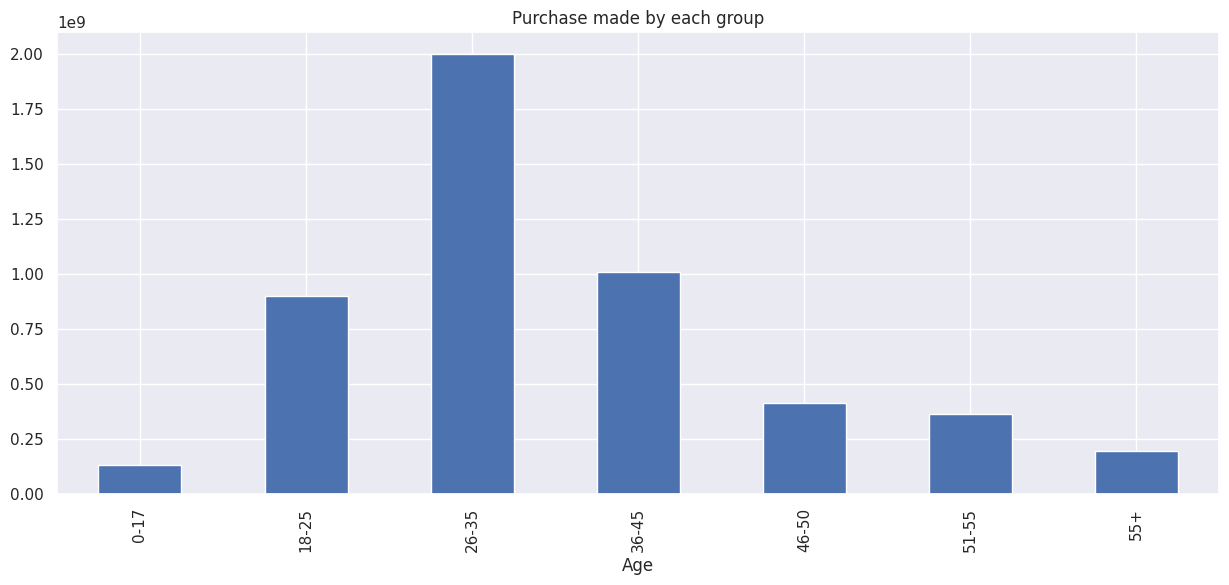

In [147]:
dt1.groupby('Age').sum()['Purchase'].plot(kind='bar',title='Purchase made by each group',figsize=(15,6))

<ipython-input-148-a4af3f91cbdc>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dt1.groupby('Age').sum()['Purchase'].plot(kind='pie',title='Purchase made by each group',figsize=(15,6),autopct='%.1f%%')


<Axes: title={'center': 'Purchase made by each group'}, ylabel='Purchase'>

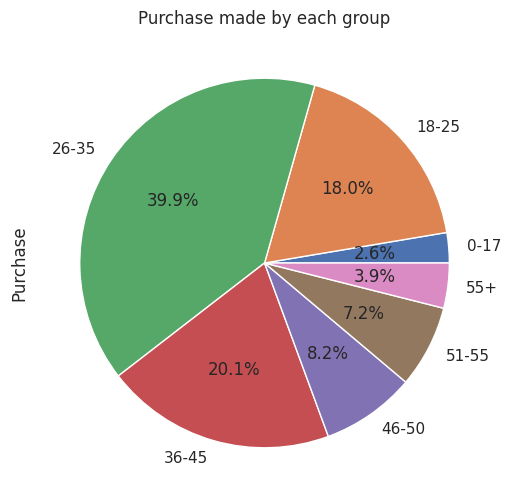

In [148]:
dt1.groupby('Age').sum()['Purchase'].plot(kind='pie',title='Purchase made by each group',figsize=(15,6),autopct='%.1f%%')

<ipython-input-149-95aa18649c5a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dt1.groupby('Age').mean()['Purchase'].plot(kind='pie',title='Purchase made by each group',figsize=(15,6),autopct='%.1f%%')


<Axes: title={'center': 'Purchase made by each group'}, ylabel='Purchase'>

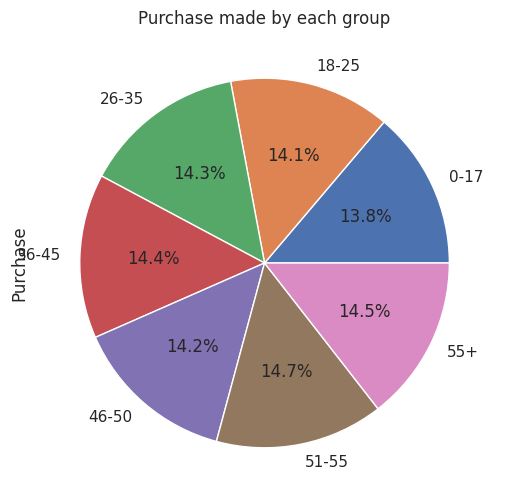

In [149]:
dt1.groupby('Age').mean()['Purchase'].plot(kind='pie',title='Purchase made by each group',figsize=(15,6),autopct='%.1f%%')

<Axes: >

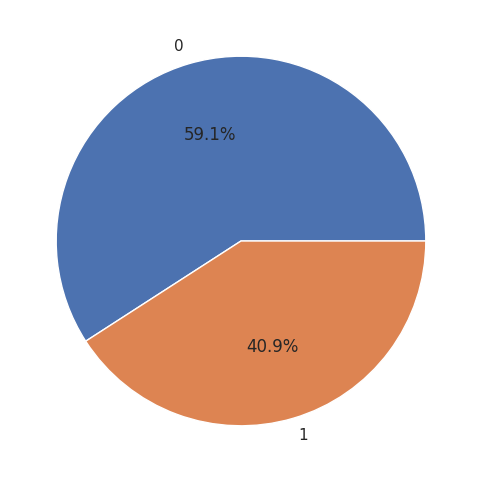

In [150]:
dt1.groupby('Marital_Status').size().plot(kind='pie',autopct='%.1f%%')

<Axes: >

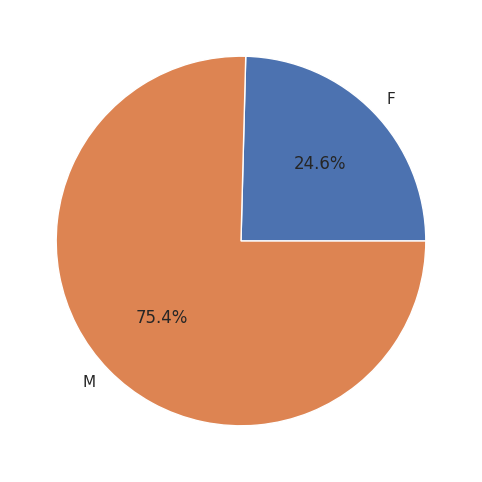

In [151]:
dt1.groupby('Gender').size().plot(kind='pie',autopct='%.1f%%')

<ipython-input-152-e6b9a9e949c6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dt1.groupby('Marital_Status').sum()['Purchase'].plot(kind='pie',autopct='%.1f%%')


<Axes: ylabel='Purchase'>

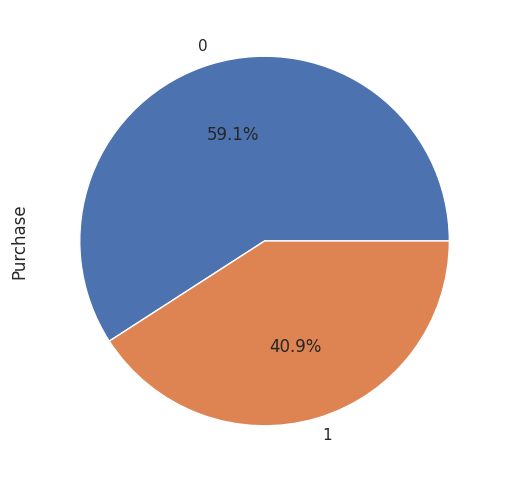

In [152]:
dt1.groupby('Marital_Status').sum()['Purchase'].plot(kind='pie',autopct='%.1f%%')

<ipython-input-153-01806dcef9a8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dt1.groupby('Marital_Status').sum()['Purchase'].plot(kind='bar')


<Axes: xlabel='Marital_Status'>

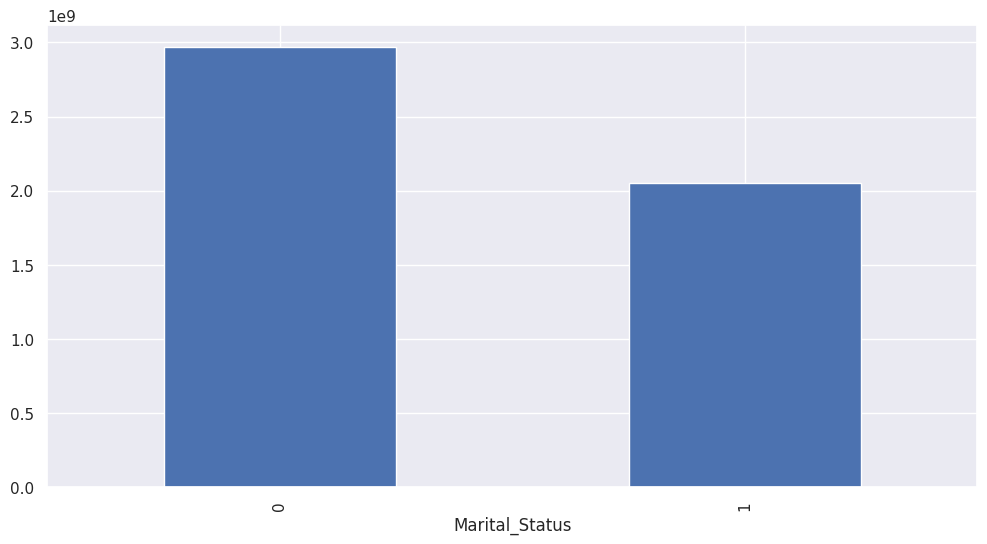

In [153]:
dt1.groupby('Marital_Status').sum()['Purchase'].plot(kind='bar')

<ipython-input-154-a649f097822a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dt1.groupby('Marital_Status').mean()['Purchase'].plot(kind='pie',autopct='%.1f%%')


<Axes: ylabel='Purchase'>

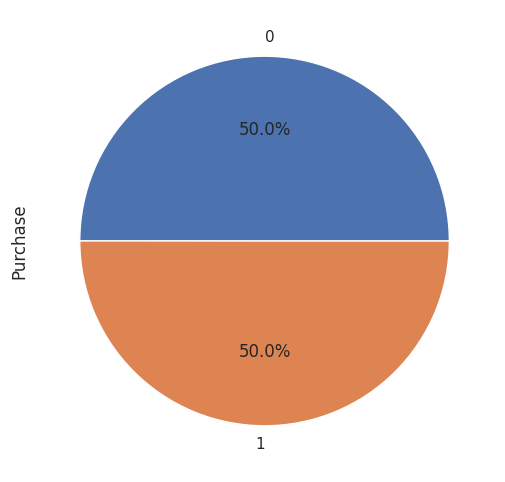

In [154]:
dt1.groupby('Marital_Status').mean()['Purchase'].plot(kind='pie',autopct='%.1f%%')

<Axes: xlabel='Age', ylabel='count'>

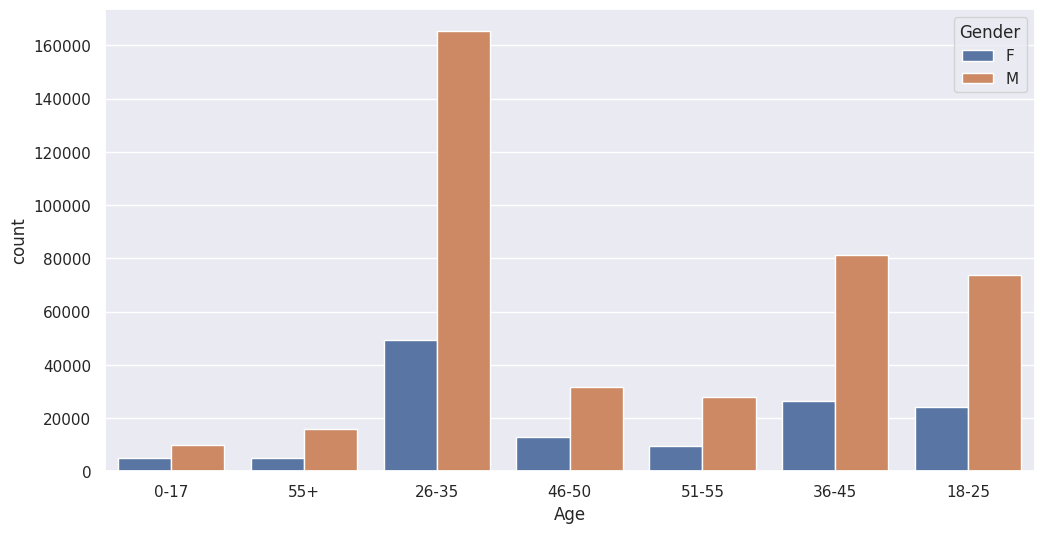

In [155]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Age',hue='Gender',data=dt1)

<Axes: xlabel='Gender', ylabel='count'>

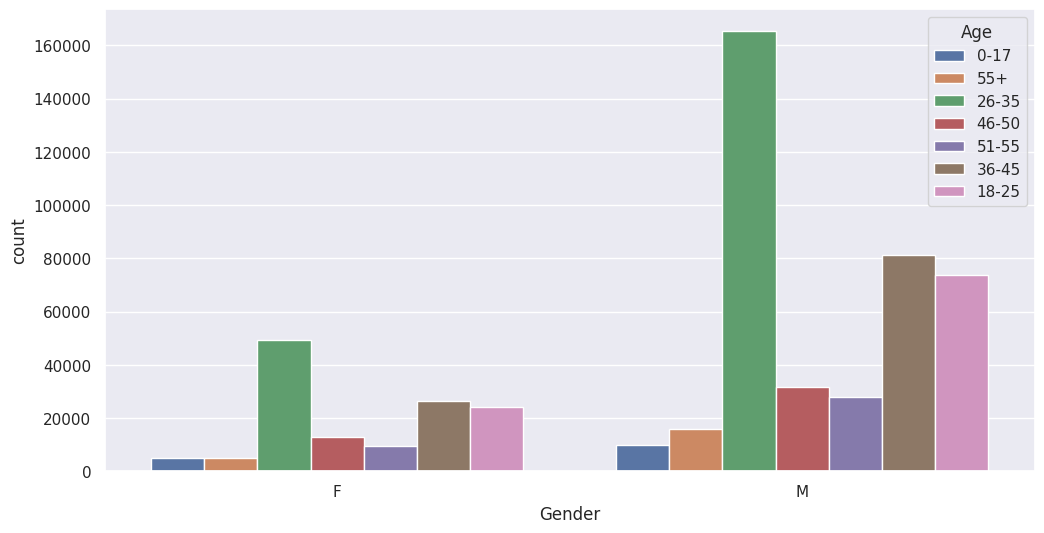

In [156]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Gender',hue='Age',data=dt1)

<Axes: xlabel='Gender', ylabel='count'>

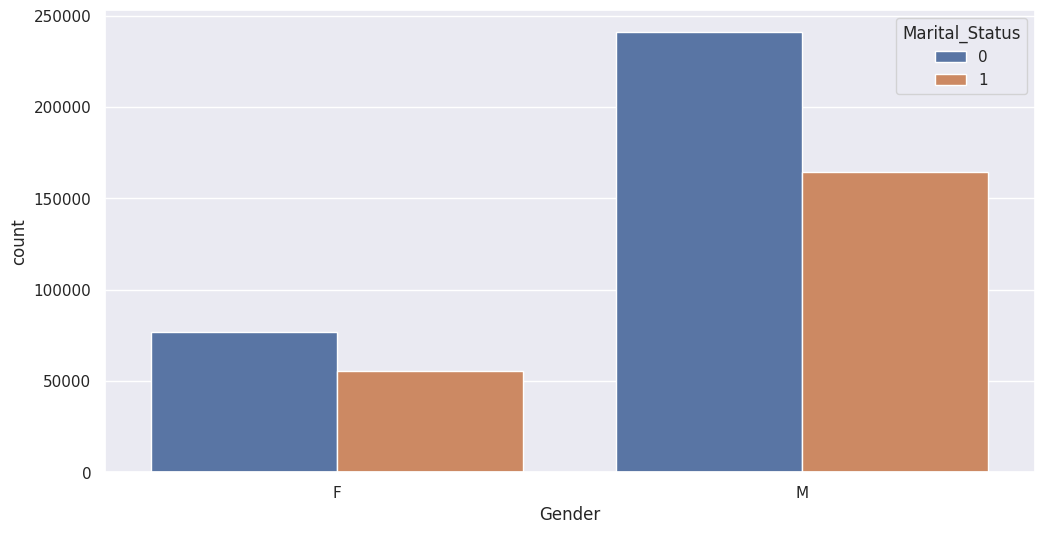

In [157]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Gender',hue='Marital_Status',data=dt1)

<Axes: xlabel='City_Category', ylabel='count'>

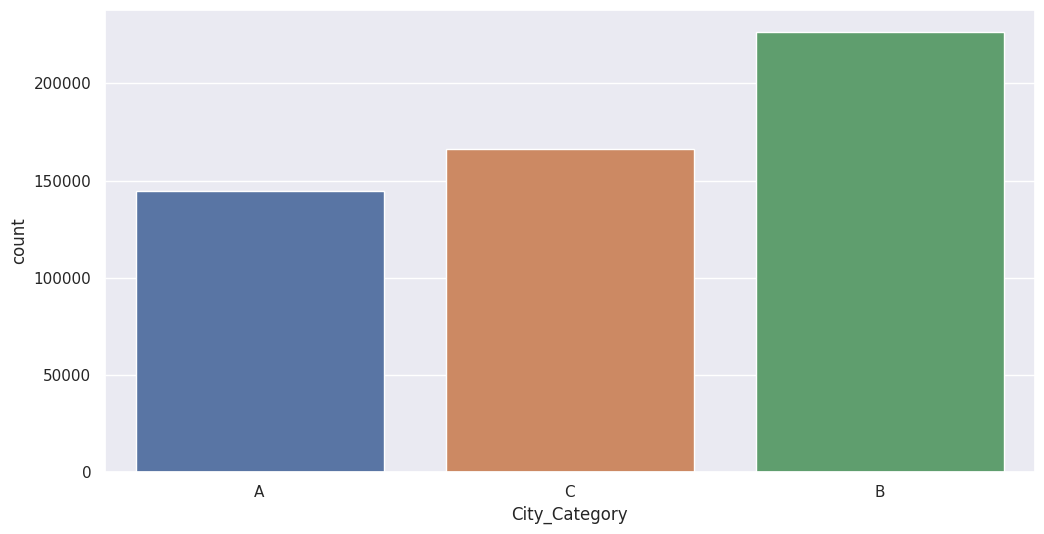

In [158]:
sns.countplot(x=dt1['City_Category'])

<Axes: xlabel='Age', ylabel='count'>

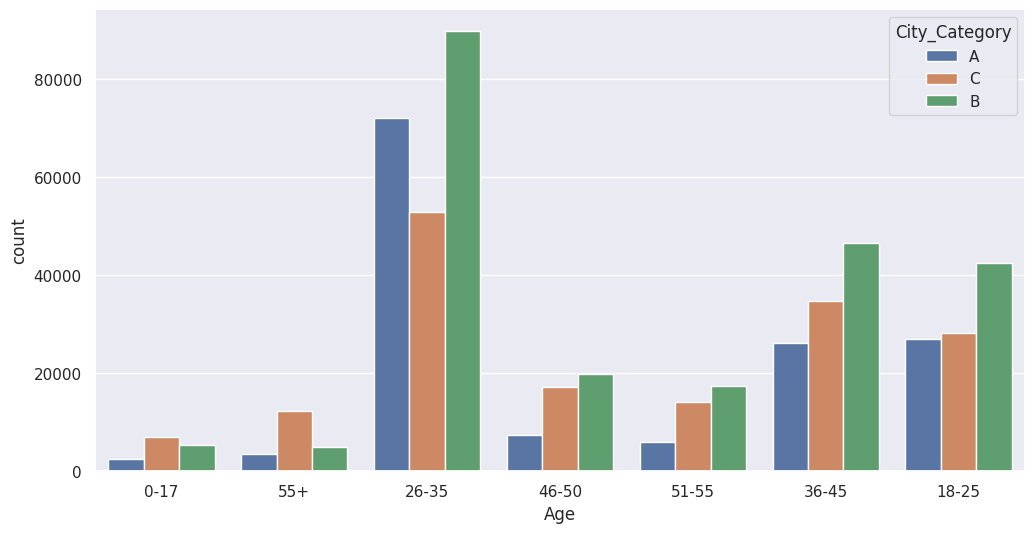

In [159]:
sns.countplot(x='Age',hue=dt1['City_Category'],data=dt1)

<Axes: xlabel='Marital_Status', ylabel='count'>

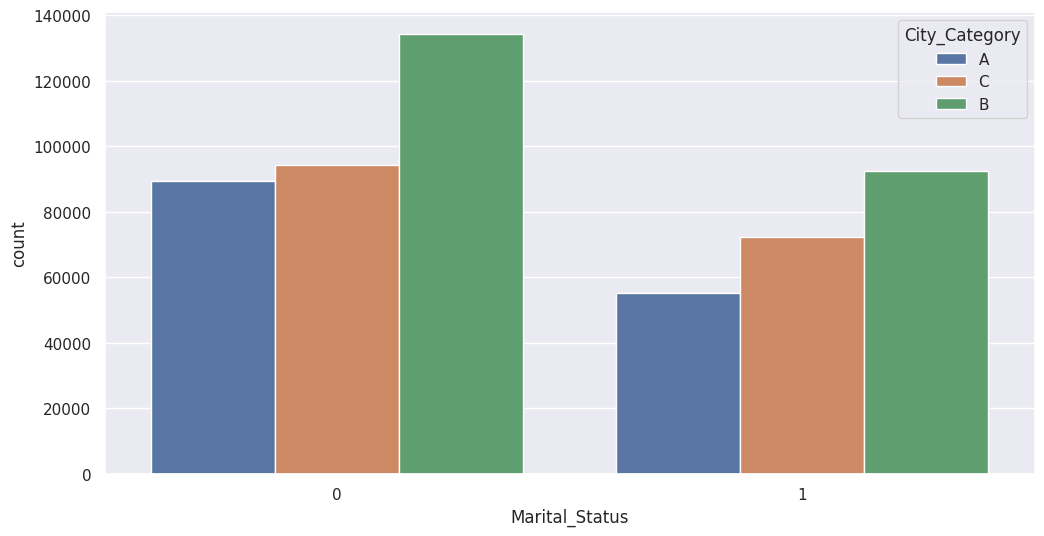

In [160]:
sns.countplot(x='Marital_Status',hue='City_Category',data=dt1)

<Axes: xlabel='City_Category', ylabel='count'>

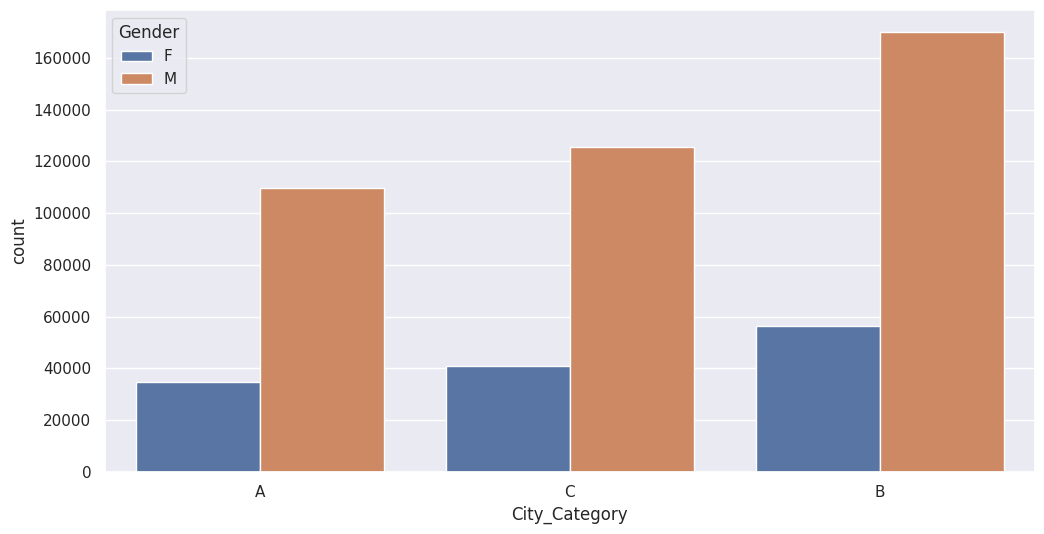

In [161]:
sns.countplot(x='City_Category',hue='Gender',data=dt1)

<ipython-input-162-9b4f66fb1d21>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dt1.groupby('City_Category').sum()['Purchase'].plot(kind='bar')


<Axes: xlabel='City_Category'>

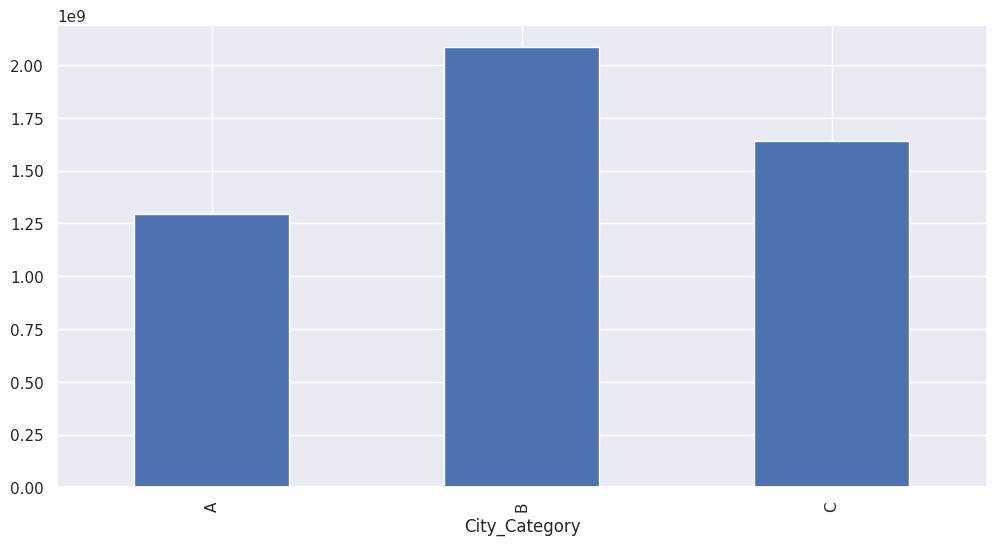

In [162]:
dt1.groupby('City_Category').sum()['Purchase'].plot(kind='bar')

<ipython-input-163-a7e7b9149c8f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dt1.groupby('City_Category').sum()['Purchase'].plot(kind='pie',autopct='%.1f%%')


<Axes: ylabel='Purchase'>

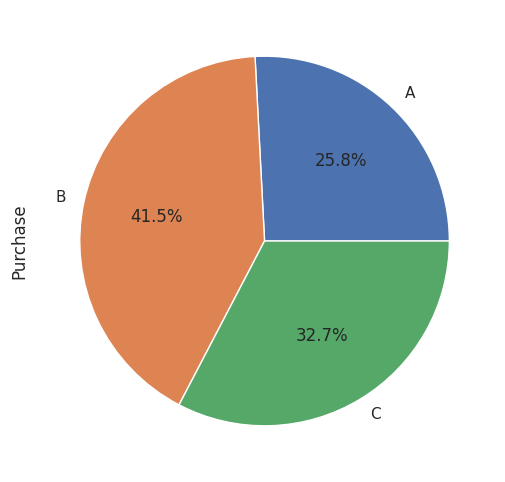

In [163]:
dt1.groupby('City_Category').sum()['Purchase'].plot(kind='pie',autopct='%.1f%%')

<ipython-input-164-b26bfa5f8a70>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dt1.groupby('City_Category').mean()['Purchase'].plot(kind='pie',autopct='%.1f%%')


<Axes: ylabel='Purchase'>

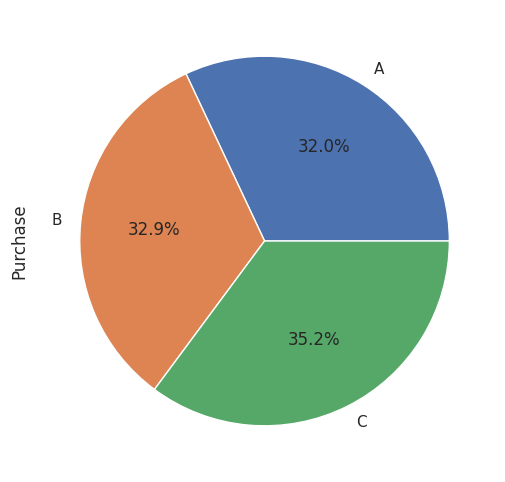

In [164]:
dt1.groupby('City_Category').mean()['Purchase'].plot(kind='pie',autopct='%.1f%%')

<ipython-input-165-8a37d319df41>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dt1.groupby('City_Category').std()['Purchase'].plot(kind='pie',autopct='%.1f%%')


<Axes: ylabel='Purchase'>

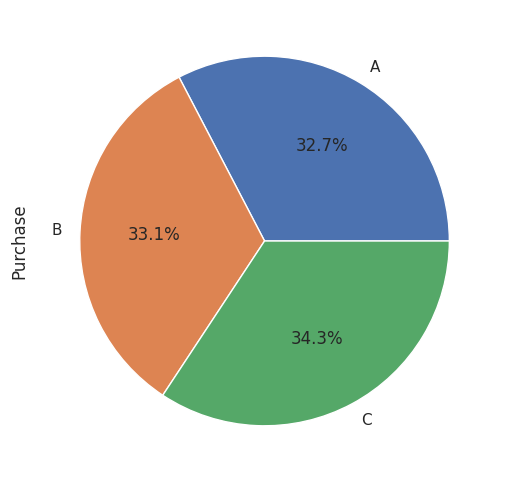

In [165]:
dt1.groupby('City_Category').std()['Purchase'].plot(kind='pie',autopct='%.1f%%')

<Axes: >

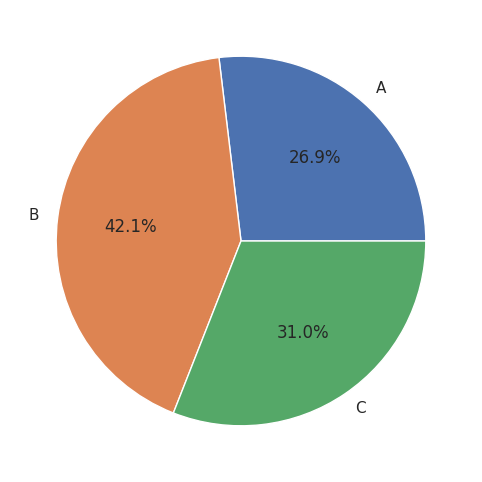

In [166]:
dt1.groupby('City_Category').size().plot(kind='pie',autopct='%.1f%%')

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

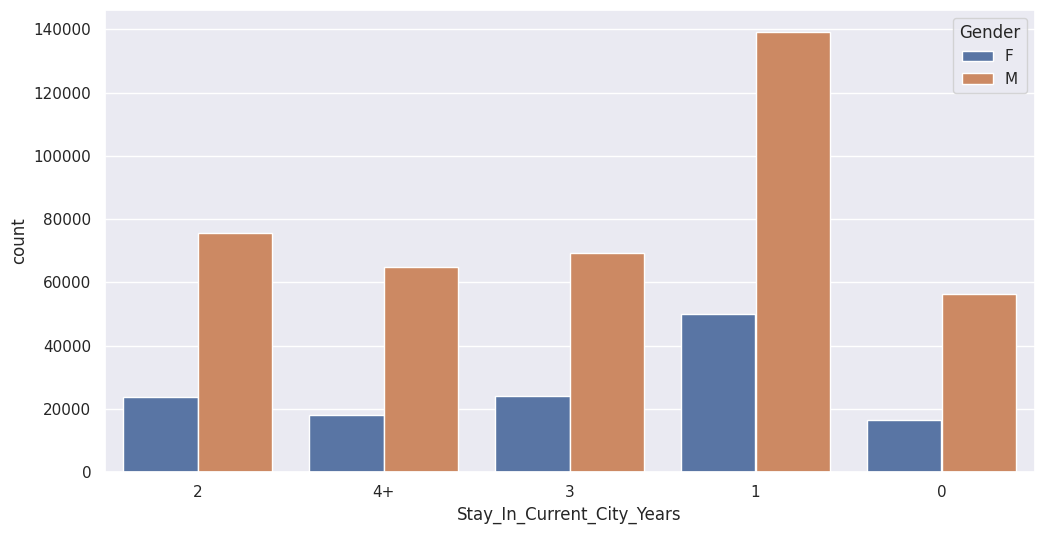

In [167]:
sns.countplot(x='Stay_In_Current_City_Years',hue='Gender',data=dt1)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

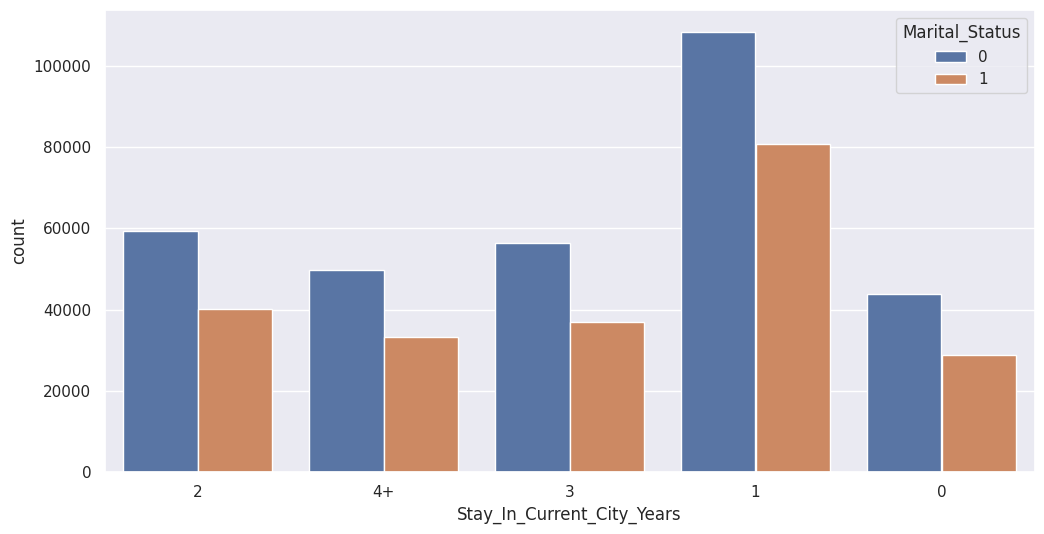

In [168]:
sns.countplot(x='Stay_In_Current_City_Years',hue='Marital_Status',data=dt1)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

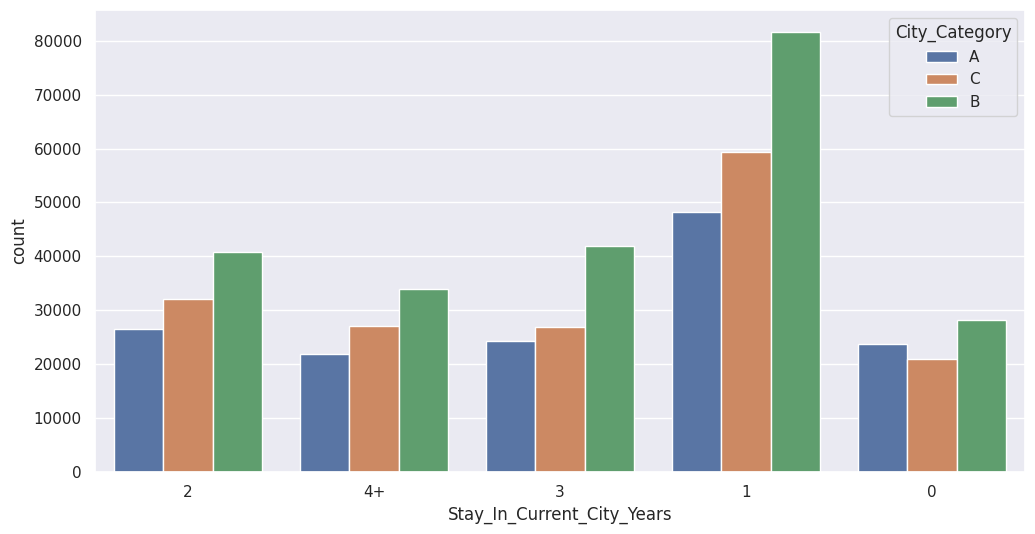

In [169]:
sns.countplot(x='Stay_In_Current_City_Years',hue='City_Category',data=dt1)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

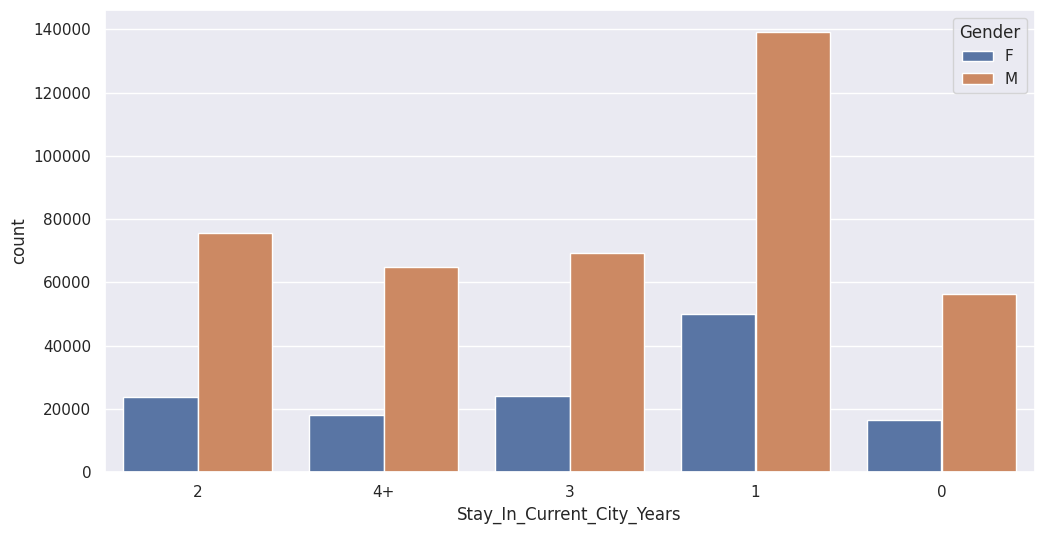

In [170]:
sns.countplot(x='Stay_In_Current_City_Years',hue='Gender',data=dt1)

<ipython-input-171-9b93518c5361>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dt1.groupby('Stay_In_Current_City_Years').sum()['Purchase'].plot(kind='pie',autopct='%.1f%%')


<Axes: ylabel='Purchase'>

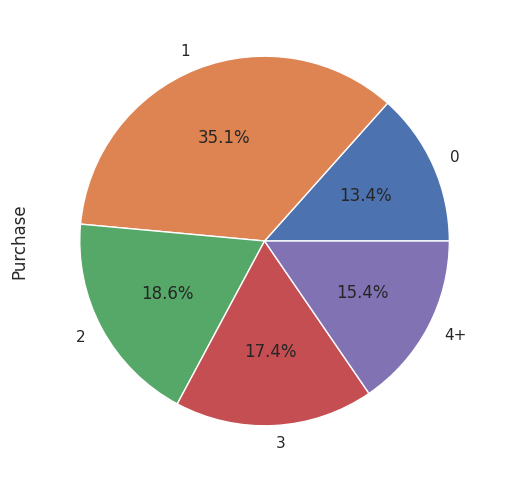

In [171]:
dt1.groupby('Stay_In_Current_City_Years').sum()['Purchase'].plot(kind='pie',autopct='%.1f%%')

<ipython-input-172-a1fb3dcff605>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dt1.groupby('Stay_In_Current_City_Years').sum()['Purchase'].plot(kind='bar')


<Axes: xlabel='Stay_In_Current_City_Years'>

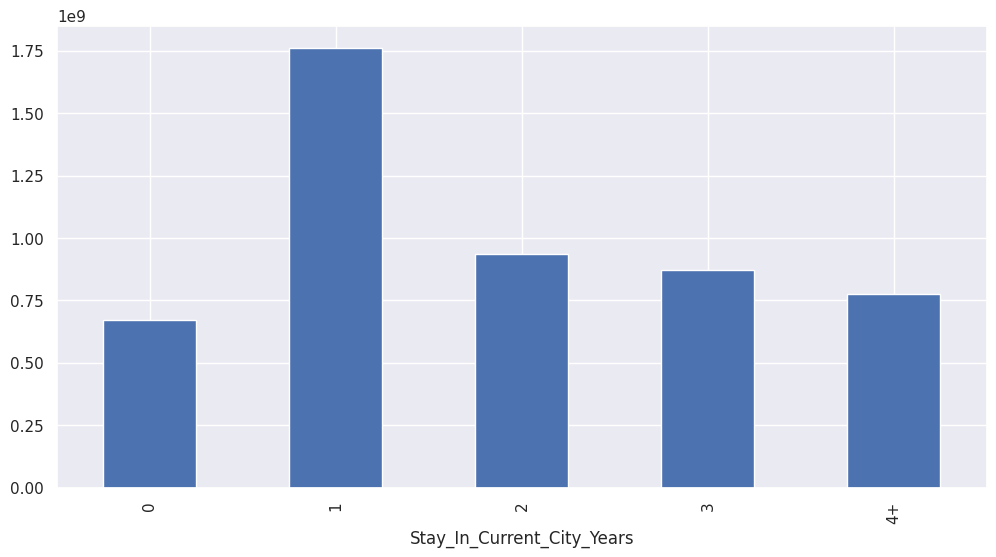

In [172]:
dt1.groupby('Stay_In_Current_City_Years').sum()['Purchase'].plot(kind='bar')

<ipython-input-173-9da2418c5624>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dt1.groupby('Stay_In_Current_City_Years').mean()['Purchase'].plot(kind='pie',autopct='%.1f%%')


<Axes: ylabel='Purchase'>

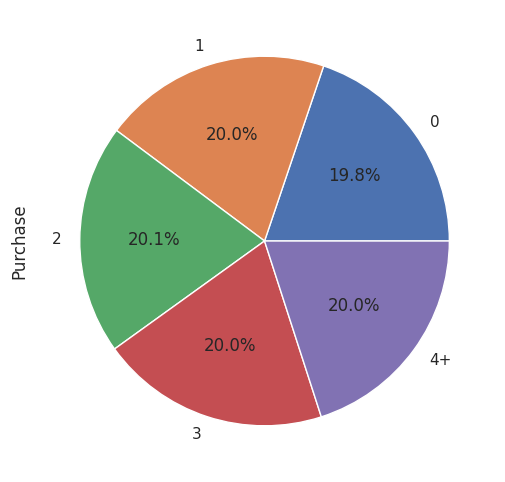

In [173]:
dt1.groupby('Stay_In_Current_City_Years').mean()['Purchase'].plot(kind='pie',autopct='%.1f%%')

<Axes: xlabel='Occupation', ylabel='count'>

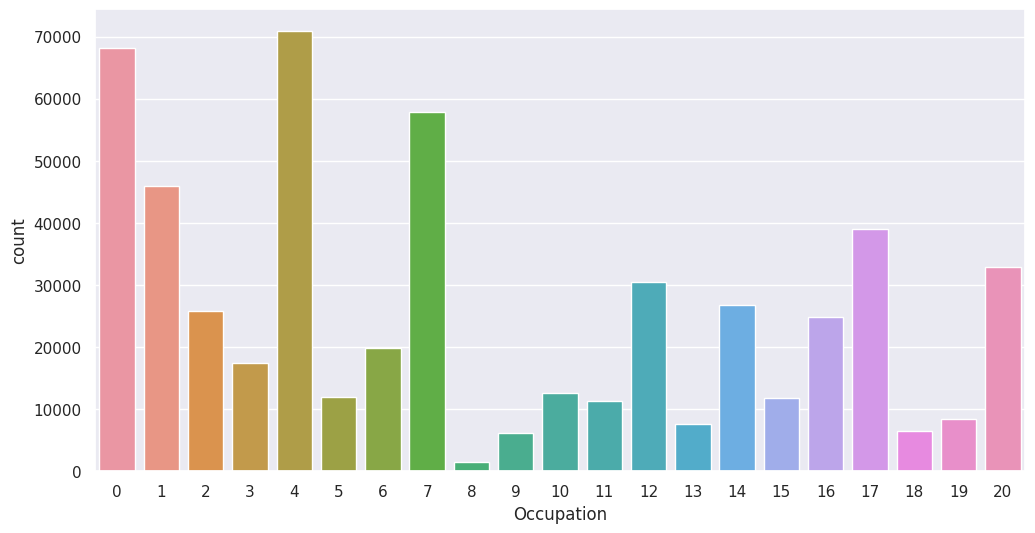

In [174]:
sns.countplot(x='Occupation',data=dt1 )

<Axes: >

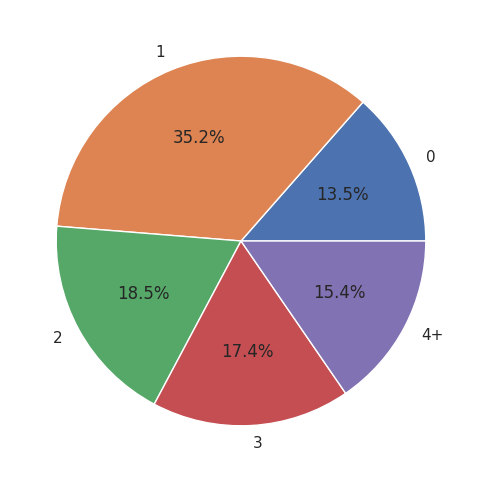

In [175]:
dt1.groupby('Stay_In_Current_City_Years').size().plot(kind='pie',autopct='%.1f%%')

<Axes: >

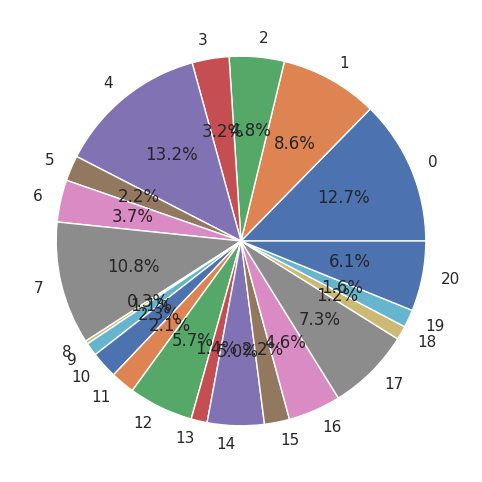

In [176]:
dt1.groupby('Occupation').size().plot(kind='pie',autopct='%.1f%%')

<Axes: xlabel='Occupation'>

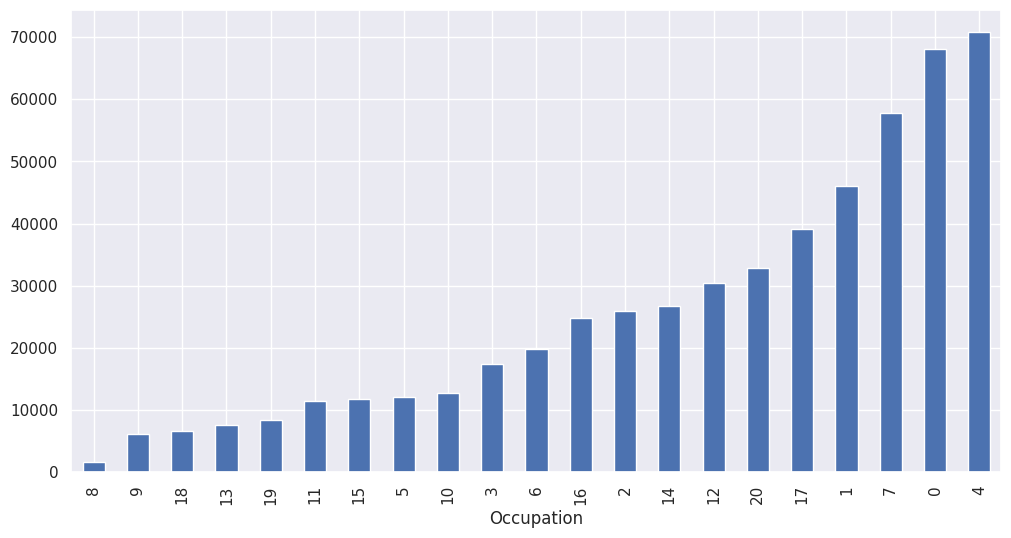

In [177]:
dt1.groupby('Occupation').size().sort_values(ascending=True).plot(kind='bar')

<ipython-input-178-fcd6840b7780>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dt1.groupby('Occupation').sum()['Purchase'].sort_values(ascending=True).plot(kind='bar')


<Axes: xlabel='Occupation'>

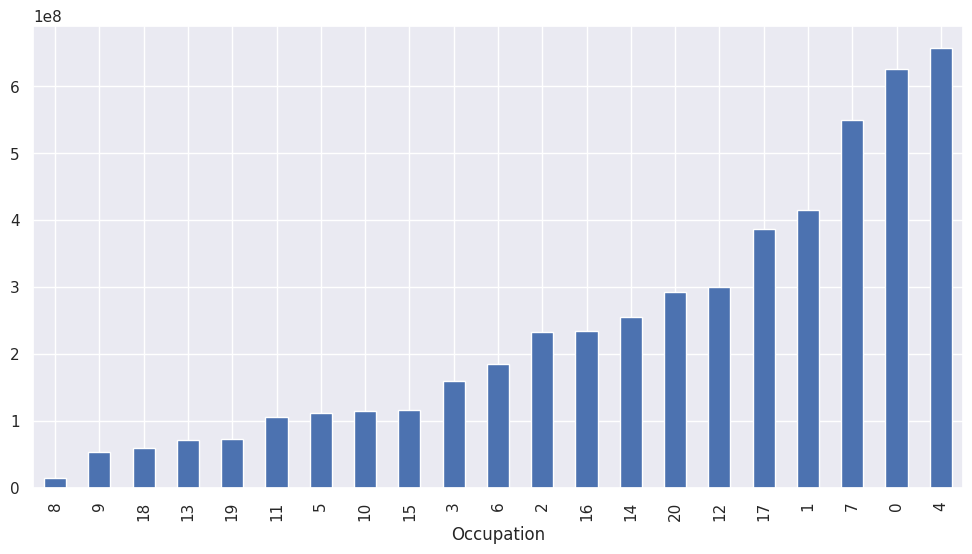

In [178]:
dt1.groupby('Occupation').sum()['Purchase'].sort_values(ascending=True).plot(kind='bar')

<Axes: xlabel='Occupation', ylabel='count'>

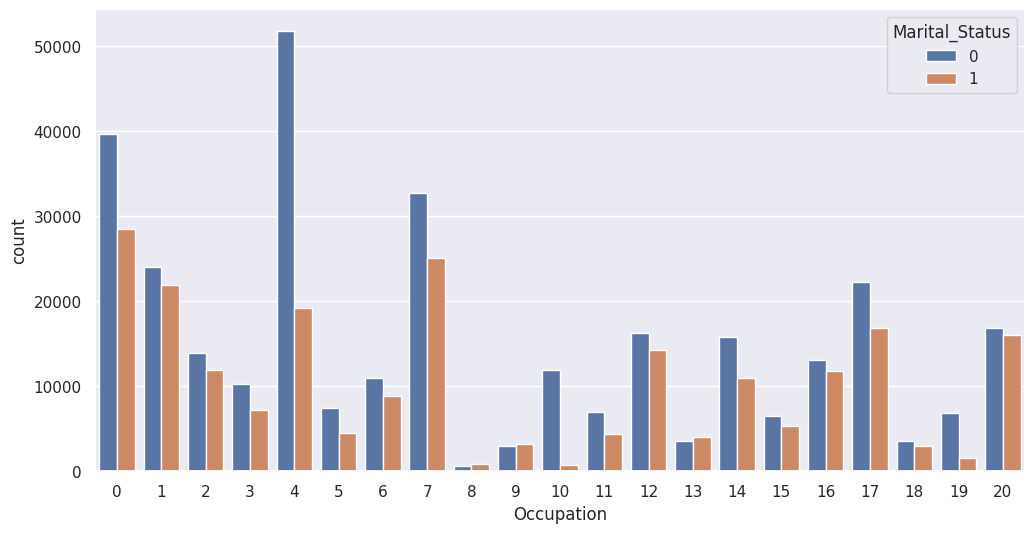

In [179]:
sns.countplot(x='Occupation',hue='Marital_Status',data=dt1)

<Axes: xlabel='Occupation', ylabel='count'>

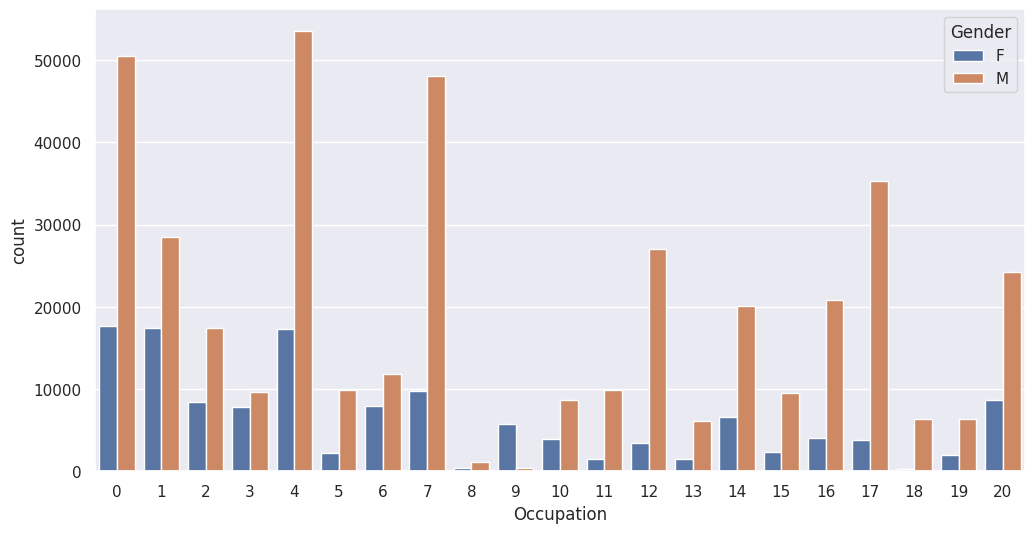

In [180]:
sns.countplot(x='Occupation',hue='Gender',data=dt1)

<Axes: xlabel='Occupation'>

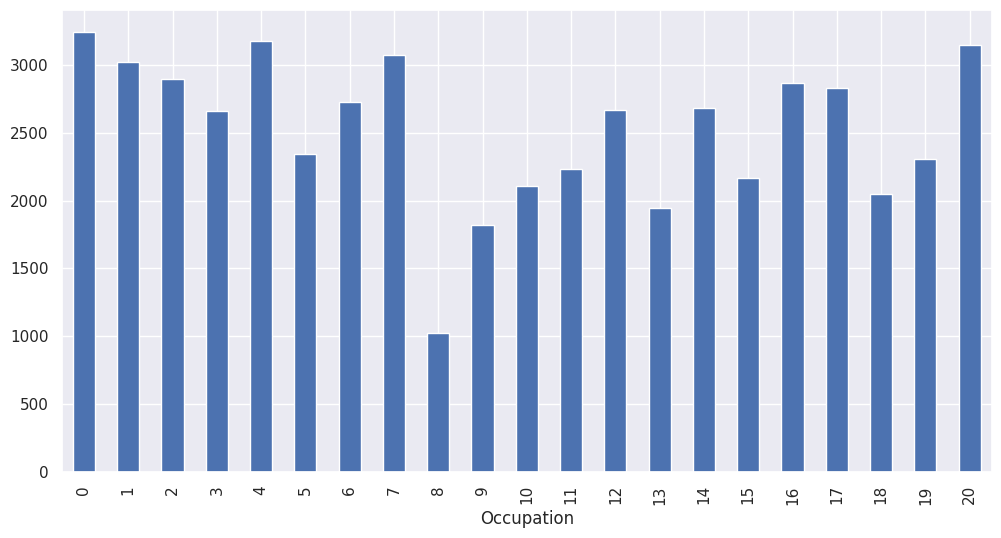

In [181]:
dt1.groupby('Occupation').nunique()['Product_ID'].plot(kind='bar')

<Axes: xlabel='Occupation'>

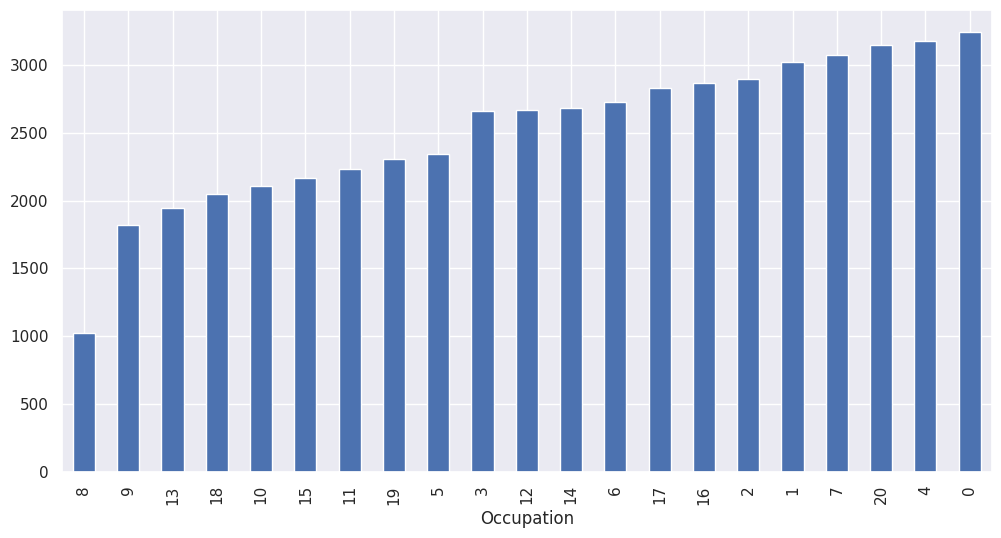

In [182]:
dt1.groupby('Occupation').nunique()['Product_ID'].sort_values().plot(kind='bar')

<Axes: xlabel='Product_Category_1'>

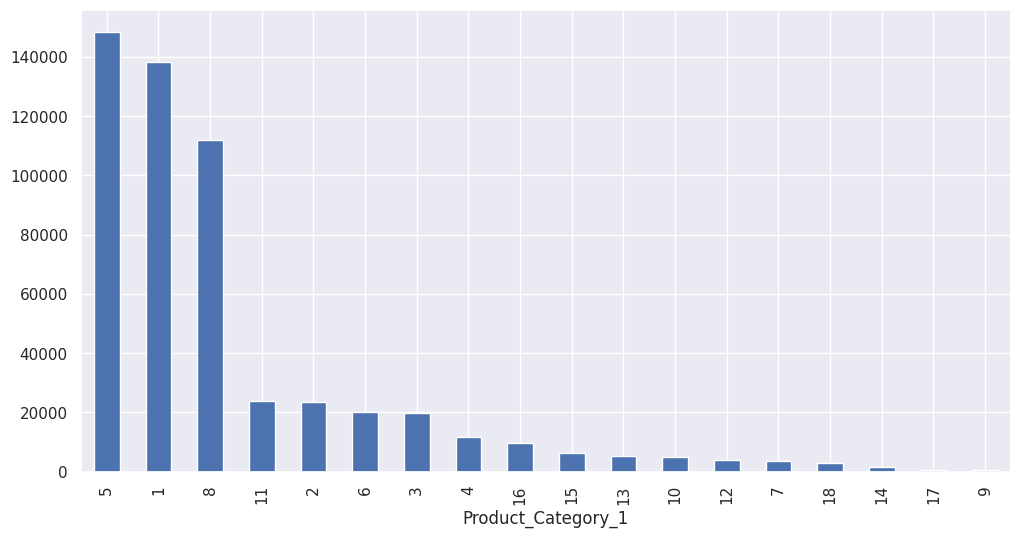

In [183]:
dt1.groupby('Product_Category_1').size().sort_values(ascending=False).plot(kind='bar')

<ipython-input-184-5ac08dc6d203>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dt1.groupby('Product_Category_1').sum()['Purchase'].sort_values(ascending=False).plot(kind='bar')


<Axes: xlabel='Product_Category_1'>

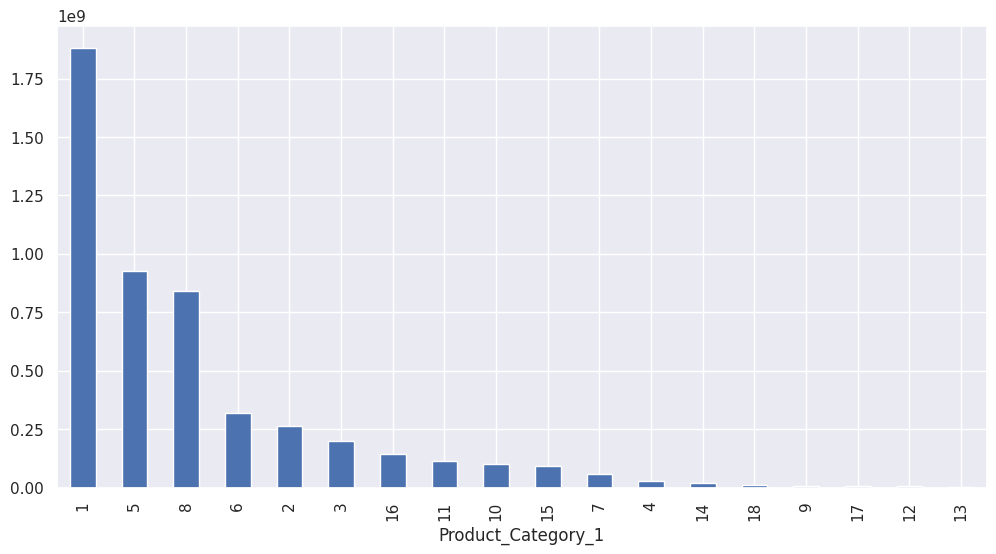

In [184]:
dt1.groupby('Product_Category_1').sum()['Purchase'].sort_values(ascending=False).plot(kind='bar')

<ipython-input-185-aadce6a013b5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dt1.groupby('Product_Category_1').mean()['Purchase'].sort_values(ascending=False).plot(kind='bar')


<Axes: xlabel='Product_Category_1'>

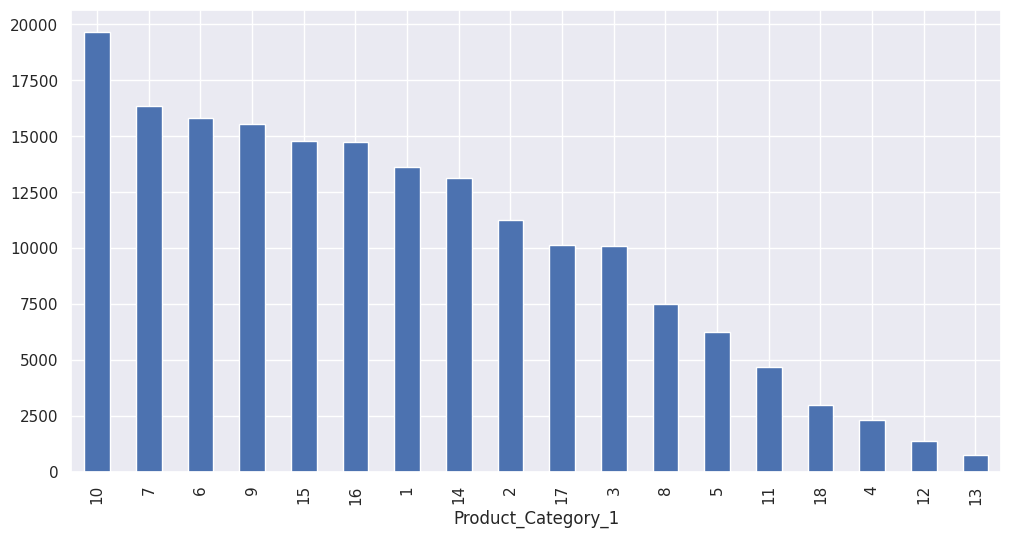

In [185]:
dt1.groupby('Product_Category_1').mean()['Purchase'].sort_values(ascending=False).plot(kind='bar')

<ipython-input-186-207237b61a6a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dt1.groupby('Product_ID').sum()['Purchase'].nlargest(10).sort_values(ascending=False).plot(kind='bar')


<Axes: xlabel='Product_ID'>

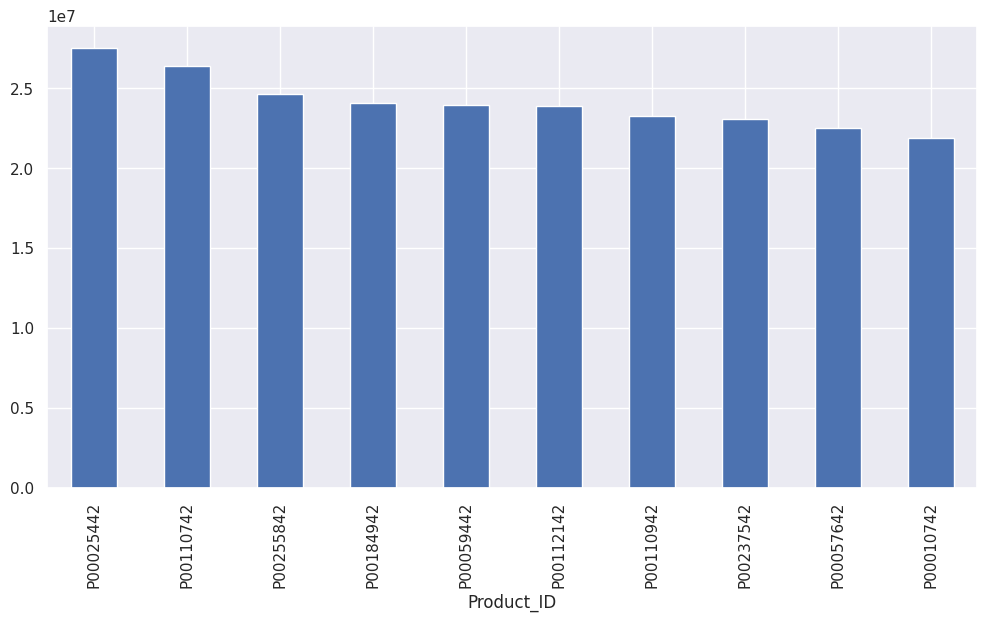

In [186]:
dt1.groupby('Product_ID').sum()['Purchase'].nlargest(10).sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='Product_Category_1', ylabel='count'>

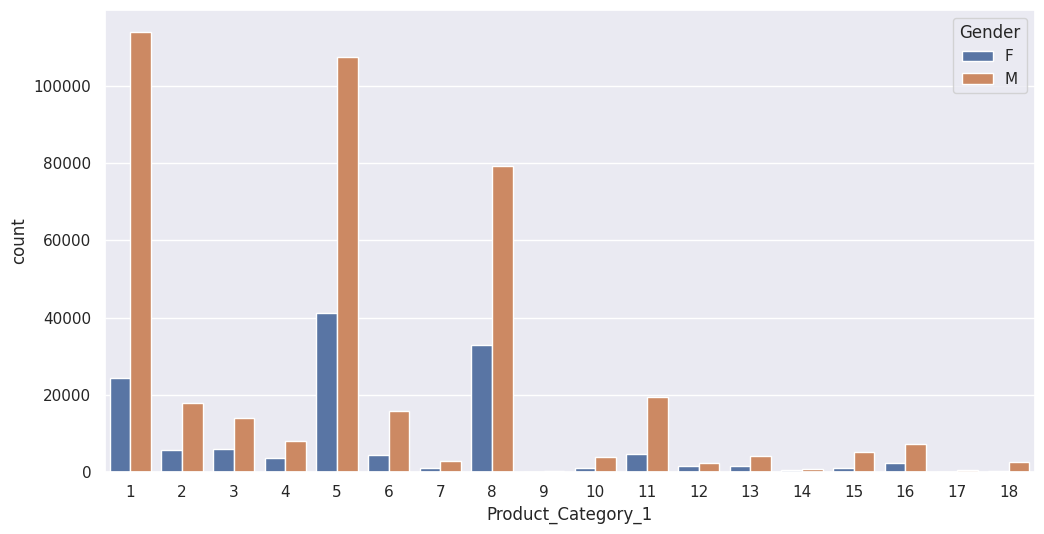

In [187]:
sns.countplot(x='Product_Category_1',hue='Gender',data=dt1)

<Axes: xlabel='Product_Category_1', ylabel='count'>

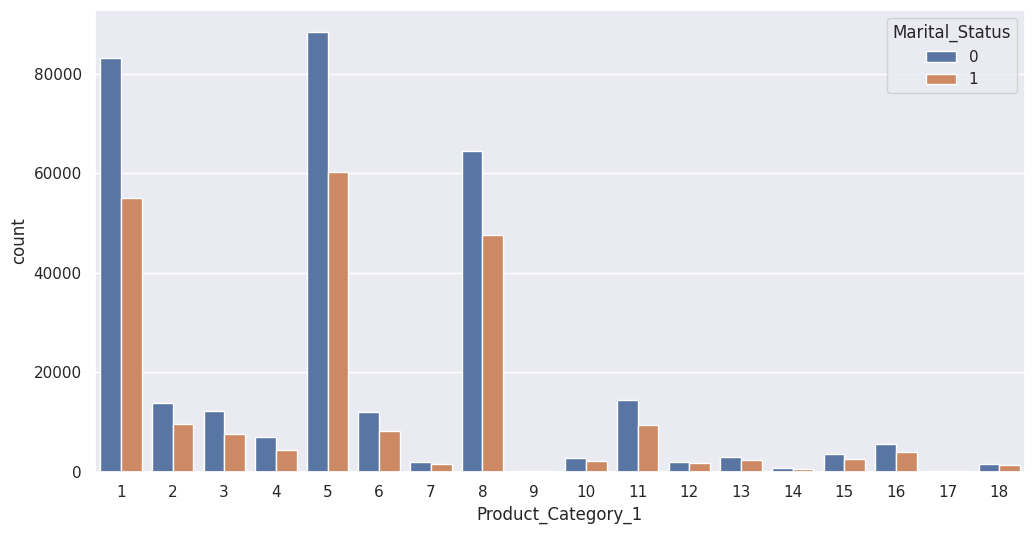

In [188]:
sns.countplot(x='Product_Category_1',hue='Marital_Status',data=dt1)

In [189]:
l=[]
for i in range(len(dt1)):
  l.append(str(dt1['Gender'][i])+"_"+str(dt1['Marital_Status'][i]))
dt1['MaritalGender']=l

<Axes: xlabel='MaritalGender', ylabel='count'>

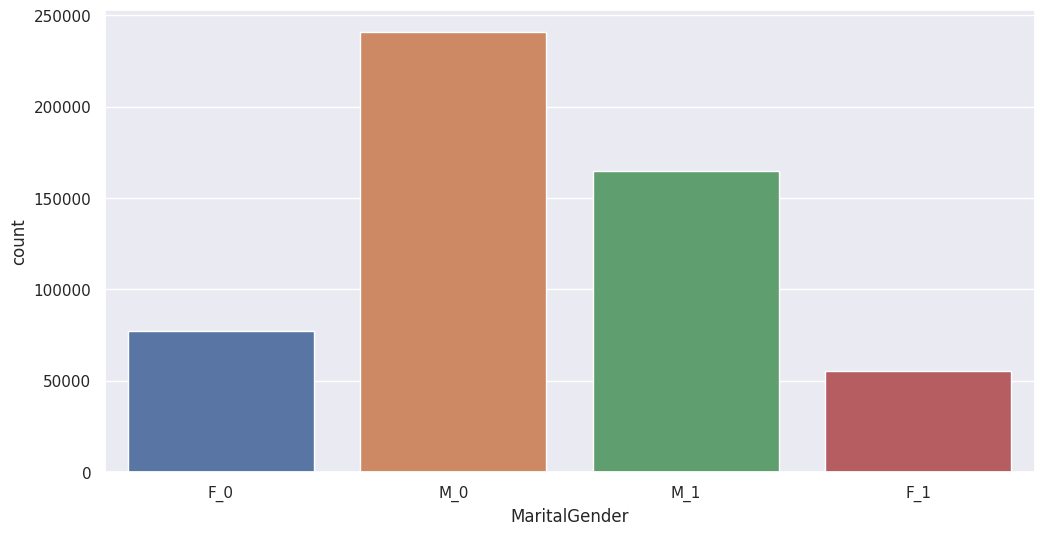

In [190]:
sns.countplot(x='MaritalGender',data=dt1)

<Axes: xlabel='Age', ylabel='count'>

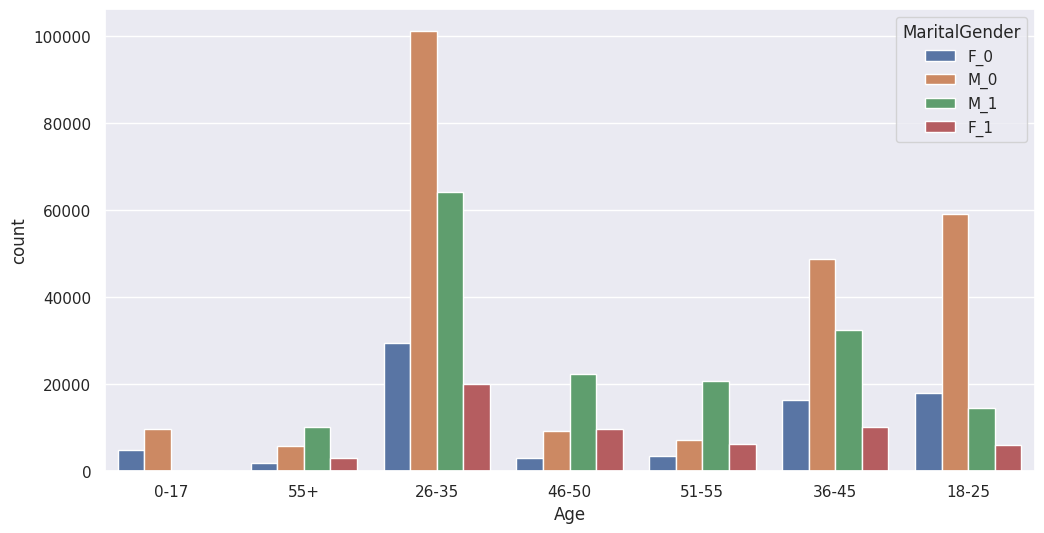

In [191]:
sns.countplot(x='Age',hue='MaritalGender',data=dt1)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

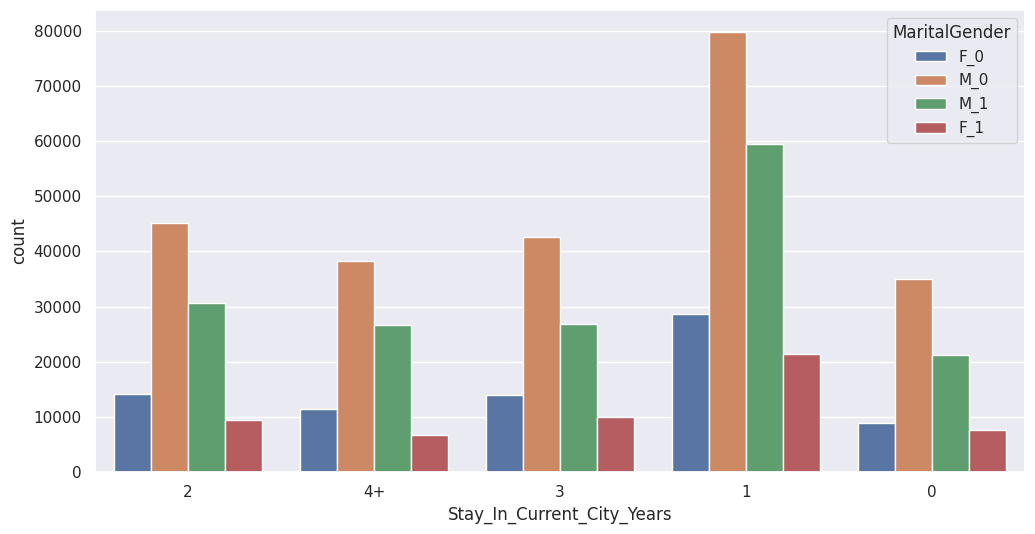

In [192]:
sns.countplot(x='Stay_In_Current_City_Years',hue='MaritalGender',data=dt1)

<Axes: xlabel='City_Category', ylabel='count'>

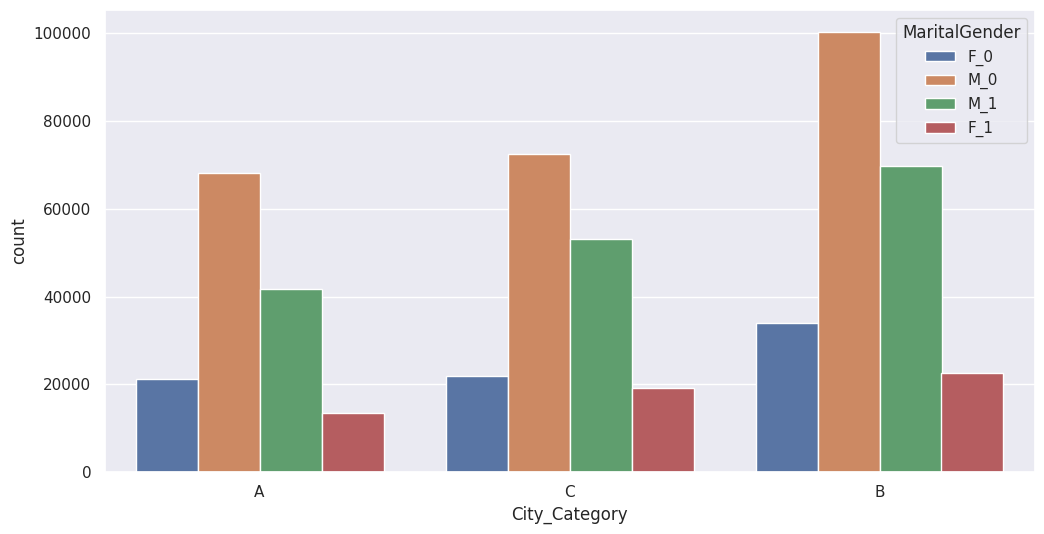

In [193]:
sns.countplot(x='City_Category',hue='MaritalGender',data=dt1)